In [109]:
# هذه البيانات تهدف إلى التنبؤ بما إذا كان دخل الفرد أكثر من 50 ألف دولار (>50K) أو 50 ألف أو أقل (<=50K) سنويًا، وذلك بناءً على معلومات ديموغرافية وشخصية.

"""
| الاسم             | الوصف                                                                                      |
| ----------------- | ------------------------------------------------------------------------------------------ |
| `age`             | عمر الفرد.                                                                                 
| `workclass`       | نوع جهة العمل (حكومي، خاص، بدون عمل...).                                                 |
| `fnlwgt`          | وزن إحصائي يستخدم لتمثيل عدد الأشخاص الذين يماثلون هذا الفرد في التعداد.               |
| `education`       | مستوى التعليم (مثلاً: Bachelor, HS-grad...).                                                |
| `educational-num` | التمثيل الرقمي لمستوى التعليم (مثلاً: HS-grad = 9).                                        |
| `marital-status`  | الحالة الاجتماعية (متزوج، أعزب...).                                                       |
| `occupation`      | نوع المهنة (مثلاً: Tech-support, Sales...).                                                  |
| `relationship`    | علاقة الفرد بالعائلة (زوج، ابن، بدون عائلة...).                                           |
| `race`            | العرق (أبيض، أسود، آسيوي...).                                                             |
| `gender`          | الجنس (ذكر / أنثى).                                                                        |
| `capital-gain`    | مقدار الربح الرأسمالي المكتسب.                                                            |
| `capital-loss`    | مقدار الخسارة الرأسمالية.                                                                 |
| `hours-per-week`  | عدد ساعات العمل في الأسبوع.                                                                |
| `native-country`  | بلد المنشأ.                                                                                |
| `income`          | 🔥 **الهدف (Target)**: هل دخل الشخص أكثر من 50 ألف دولار سنويًا أم لا (`<=50K` أو `>50K`)؟ |
"""


'\n| الاسم             | الوصف                                                                                      |\n| ----------------- | ------------------------------------------------------------------------------------------ |\n| `age`             | عمر الفرد.                                                                                 \n| `workclass`       | نوع جهة العمل (حكومي، خاص، بدون عمل...).                                                 |\n| `fnlwgt`          | وزن إحصائي يستخدم لتمثيل عدد الأشخاص الذين يماثلون هذا الفرد في التعداد.               |\n| `education`       | مستوى التعليم (مثلاً: Bachelor, HS-grad...).                                                |\n| `educational-num` | التمثيل الرقمي لمستوى التعليم (مثلاً: HS-grad = 9).                                        |\n| `marital-status`  | الحالة الاجتماعية (متزوج، أعزب...).                                                       |\n| `occupation`      | نوع المهنة (مثلاً: Tech-support, Sales...).           

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat as nbf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer,FunctionTransformer


In [111]:
try:
    Data = pd.read_csv("adult.csv")
except:
    print("File not found")


In [112]:
Data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [113]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [114]:
Data.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [115]:
Data.shape

(48842, 15)

In [116]:
Data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [117]:
Data.duplicated().sum()

np.int64(52)

In [118]:
Data.drop_duplicates(inplace=True)



In [119]:
Data.duplicated().sum()

np.int64(0)

In [120]:
Data.shape

(48790, 15)

In [121]:
Data = Data[Data["workclass"] != "?"]
Data = Data[Data["occupation"] != "?"]
Data = Data[Data["native-country"] != "?"]

In [122]:
Data.shape

(45175, 15)

In [123]:
Data = Data.drop('fnlwgt', axis=1)

In [124]:
category_col = Data.select_dtypes(include=['object']).columns.to_list()
numeric_col = Data.select_dtypes(include=['int64']).columns.to_list()
print(f"The categorical columns are: {category_col} and The number of columes are: {len(category_col)}")
print(f"The numerical columns are: {numeric_col} and The number of columes are: {len(numeric_col)}")



The categorical columns are: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'] and The number of columes are: 9
The numerical columns are: ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] and The number of columes are: 5


In [125]:
for i in category_col:
    print(i)
    print("______________")
    print(Data[i].value_counts())


workclass
______________
workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64
education
______________
education
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: count, dtype: int64
marital-status
______________
marital-status
Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64
occupation
______________
occupation
Craft-repair       

In [126]:
Data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

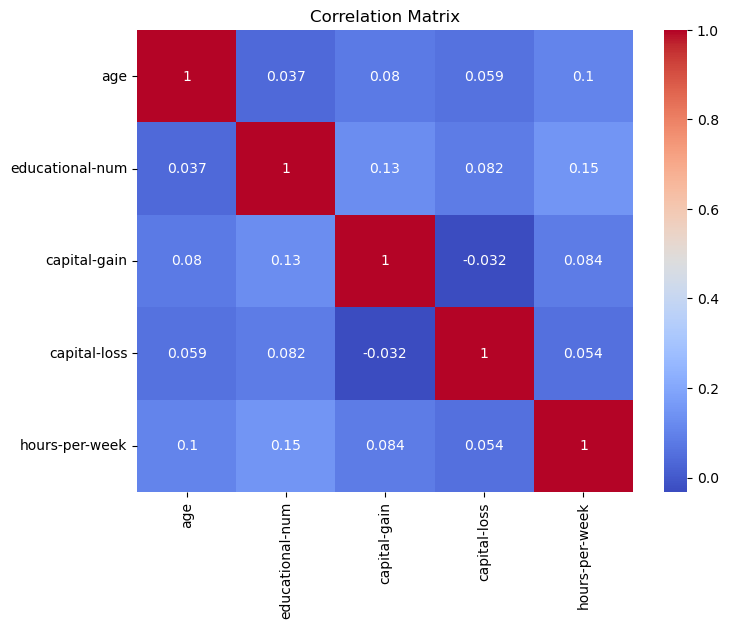

In [127]:
plt.figure(figsize=(8,6))
sns.heatmap(Data[numeric_col].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


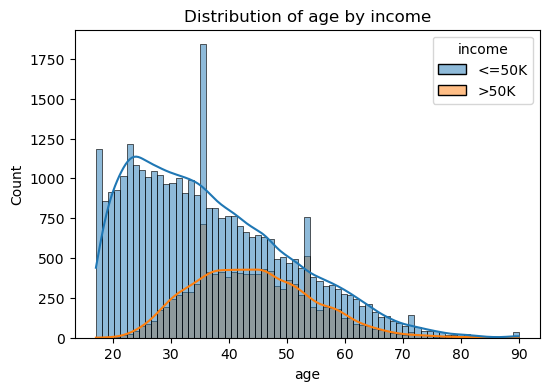

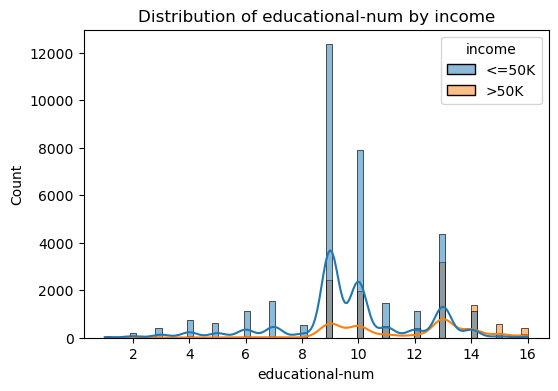

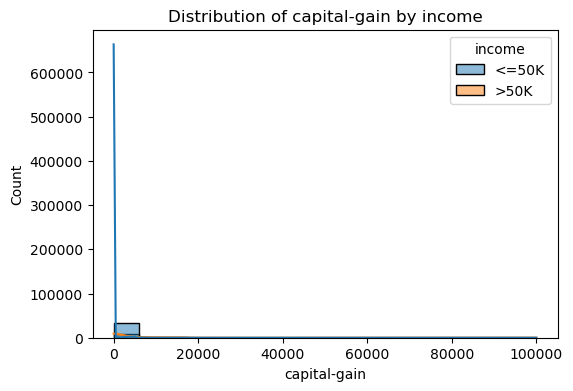

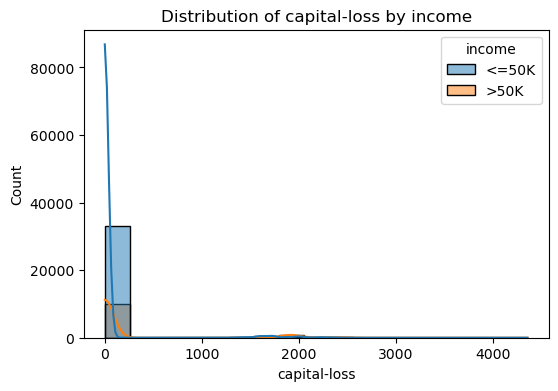

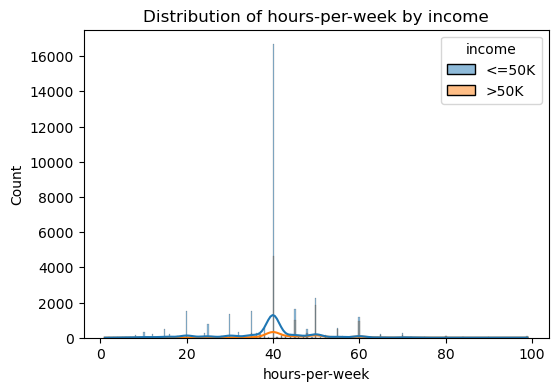

In [128]:
for column in numeric_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data=Data, x=column, hue='income', kde=True)
    plt.title(f'Distribution of {column} by income')
    plt.show()

    #الفئات العمرية التي تحقق دخلاً أعلى (مثل 40-50 سنة)
    #الأفراد الأصغر سناً (20-30) يمثلون غالبية الدخل المنخفض
    #كلا المتغيرين (age و fnlwgt) تُظهران أن فئة الدخل الأقل من 50 ألف دولار لديها توزيع أكثر تركيزاً وعدد أكبر من الأفراد مقارنة بفئة الدخل الأعلى.
    #هذا يشير إلى أن العمر والوزن السكاني قد يكونان مؤشرات قوية لمستوى الدخل.

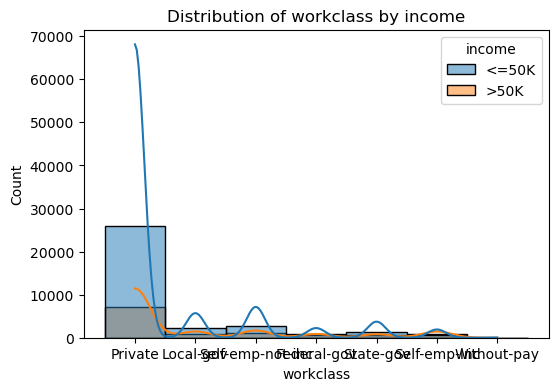

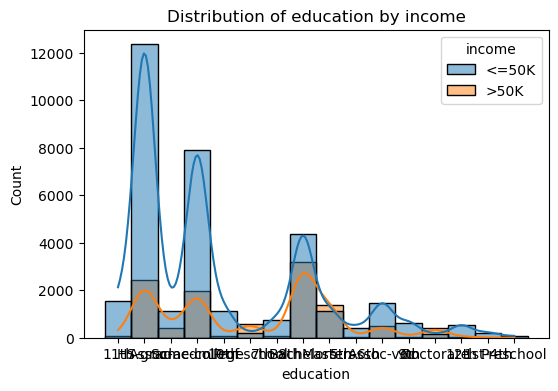

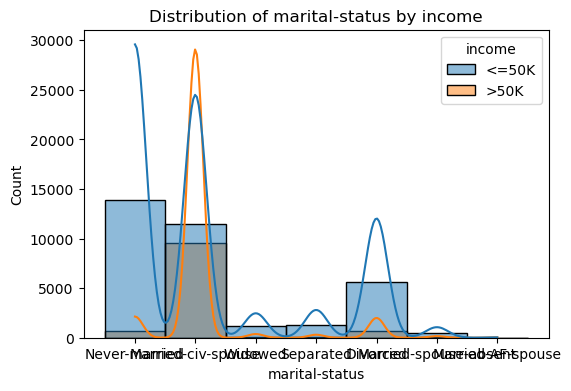

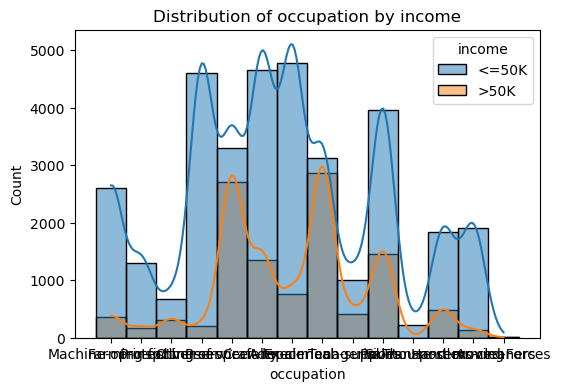

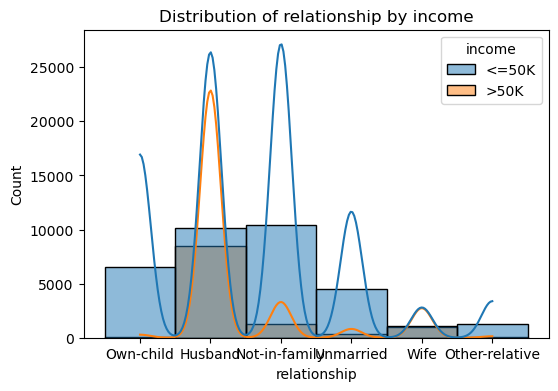

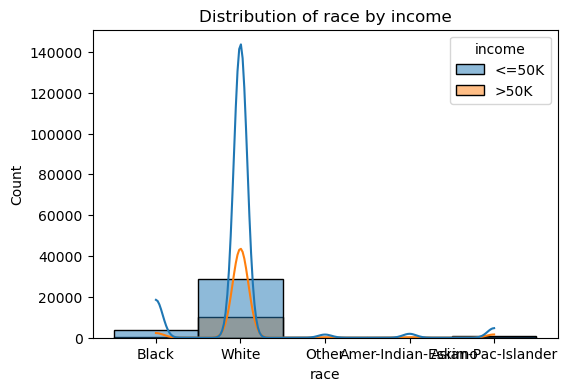

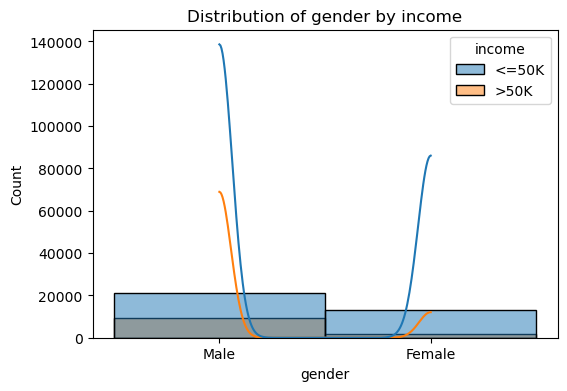

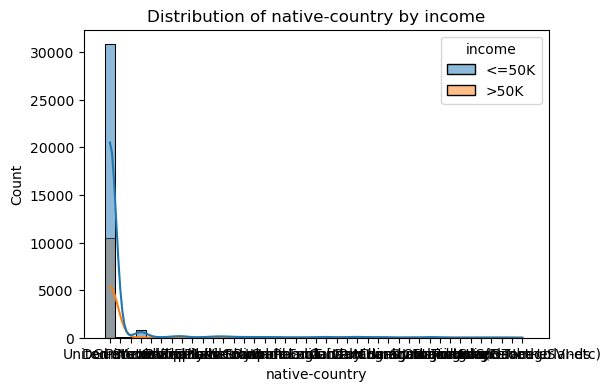

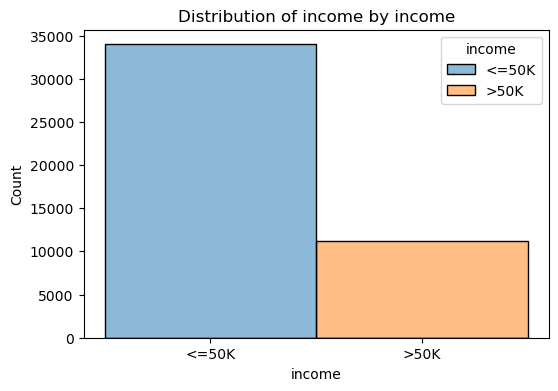

In [129]:
for column in category_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data=Data, x=column, hue='income', kde=True)
    plt.title(f'Distribution of {column} by income')
    plt.show()

In [130]:
workclass_count = Data['workclass'].value_counts().reset_index()
workclass_count

workclass  count
0           Private  33262
1  Self-emp-not-inc   3795
2         Local-gov   3100
3         State-gov   1946
4      Self-emp-inc   1645
5       Federal-gov   1406
6       Without-pay     21

In [131]:
fig = px.bar(
    workclass_count,
    x = 'workclass',
    y='count',
    title='Distribution of workclass',
)
fig.show()

In [132]:
fig = px.pie(
    workclass_count,
    names = 'workclass',
    values='count',
    title='Distribution of workclass'
)
fig.show()


In [ ]:
occupation_count = Data['occupation'].value_counts().reset_index()  #نوع المهنة 
occupation_count

occupation  count
0        Craft-repair   6010
1      Prof-specialty   6001
2     Exec-managerial   5980
3        Adm-clerical   5535
4               Sales   5405
5       Other-service   4805
6   Machine-op-inspct   2965
7    Transport-moving   2316
8   Handlers-cleaners   2045
9     Farming-fishing   1475
10       Tech-support   1419
11    Protective-serv    975
12    Priv-house-serv    230
13       Armed-Forces     14

In [134]:
fig = px.bar(
    occupation_count,
    x='occupation',
    y='count',
    title='Distribution of occupation',
    # color_discrete_sequence=['skyblue']  # لون مخصص
)
fig.show()


In [135]:
fig = px.pie(
    occupation_count,
    names = 'occupation',
    values = 'count',
    title = 'Distribution of occupation',
)
fig.show()



In [136]:

fig = px.histogram(Data, x='income', title='Distribution of Income')
fig.show()


In [168]:
fig = px.histogram(Data, x='age', color='income', barmode='overlay', nbins=40, title='Age Distribution by Income')
fig.show()


In [138]:
fig = px.box(Data, x='income', y='age', title='Age vs Income')
fig.show()


In [139]:
fig = px.histogram(Data, x='education', color='income', barmode='group', title='Education Level vs Income')
fig.show()


In [140]:
fig = px.scatter(Data, x='age', y='capital-gain', color='income', title='Age vs Capital Gain')
fig.show()
#capital-gain مقدار الربح الرأسمالي المكتسب. 

In [141]:
fig = px.box(Data, x='gender', y='hours-per-week', color='income', title='Weekly Work Hours by Gender and Income')
fig.show()


In [142]:
fig = px.pie(data_frame=Data[Data['income'] == '>50K'],
            names='gender',
            title='Gender Distribution (>50K)',
            color_discrete_sequence=['skyblue']
            )
fig.show()

fig = px.pie(data_frame=Data[Data['income'] == '<=50K'],
            names='gender',
            title='Gender Distribution (<=50K)',
            color_discrete_sequence=['skyblue']
            )
fig.show()


In [143]:
marital_counts = Data['marital-status'].value_counts().reset_index()
marital_counts

marital-status  count
0     Married-civ-spouse  21042
1          Never-married  14567
2               Divorced   6294
3              Separated   1411
4                Widowed   1277
5  Married-spouse-absent    552
6      Married-AF-spouse     32

In [144]:
fig = px.pie(
    marital_counts,
    names = 'marital-status',
    values='count',
    title='Distribution of Marital Status',
)
fig.show()


In [145]:
country_count= Data['native-country'].value_counts().reset_index()
country_count

native-country  count
0                United-States  41256
1                       Mexico    895
2                  Philippines    282
3                      Germany    193
4                  Puerto-Rico    175
5                       Canada    163
6                        India    147
7                  El-Salvador    147
8                         Cuba    133
9                      England    119
10                       China    113
11                     Jamaica    103
12                       South    101
13                       Italy    100
14          Dominican-Republic     97
15                       Japan     89
16                   Guatemala     84
17                     Vietnam     83
18                    Columbia     82
19                      Poland     81
20                       Haiti     69
21                    Portugal     62
22                        Iran     56
23                      Taiwan     55
24                      Greece     49
25                   Nicaragua     48
26                        Peru     45
27                     Ecuador     43
28                     Ireland     36
29                      France     36
30                    Thailand     29
31                        Hong     28
32                    Cambodia     26
33             Trinadad&Tobago     26
34                  Yugoslavia     23
35  Outlying-US(Guam-USVI-etc)     22
36                        Laos     21
37                    Scotland     20
38                    Honduras     19
39                     Hungary     18
40          Holand-Netherlands      1

In [146]:
fig = px.treemap(
    country_count,
    path=['native-country'],
    values='count',
    title='Treemap of Native Countries'
)
fig.show()

In [147]:
race_count = Data['race'].value_counts().reset_index()
race_count

race  count
0               White  38859
1               Black   4227
2  Asian-Pac-Islander   1301
3  Amer-Indian-Eskimo    435
4               Other    353

In [148]:
fig = px.pie(
    race_count,
    names = 'race',
    values = 'count',
    title='Distribution of Race',
    color_discrete_sequence=['skyblue']
)
fig.show()

In [149]:
X = Data.drop(['income'], axis=1)
y = Data['income'].apply(lambda x: 1 if x == '>50K' else 0)  # تحويل الهدف لقيم رقمية

In [150]:
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45175, dtype: int64

In [151]:
def clip_outliers_df(Data):
    Data = pd.DataFrame(Data).copy()
    for col in Data.columns:
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        MED = Data[col].median()
        Data.loc[(Data[col] < lower_bound) | Data[col] > upper_bound, col] = MED
        
    return Data.values

 

In [152]:
outlier_handler = FunctionTransformer(clip_outliers_df) # علشان نقدر نستخدمها كخطوة جوه Pipeline

In [153]:
category_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [154]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_col),
    ('Handel_outliers' ,outlier_handler , numeric_col),
    ('one_hot', OneHotEncoder(), category_col)
])

In [155]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression( max_iter=1000))
])

In [156]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('Handel_outliers',
                                                  FunctionTransformer(func=<function clip_outliers_df at 0x000001E52CB27C40>),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [157]:
print(Data.columns.tolist())

['age', 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [158]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)


In [159]:

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('Handel_outliers',
                                                  FunctionTransformer(func=<function clip_outliers_df at 0x000001E52CB27C40>),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('one_hot', OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [160]:
y_train_pred = pipeline.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy in train: ", train_accuracy)

Accuracy in train:  0.848699501936912


In [161]:
y_test_pred = pipeline.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy in test: ", test_accuracy)

Accuracy in test:  0.8456004427227449


In [162]:
y_test

12276    0
42882    0
5892     0
7991     1
29242    1
        ..
6259     0
21979    0
441      0
7697     0
32470    0
Name: income, Length: 9035, dtype: int64

In [163]:
Y_pred = pipeline.predict(x_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(9035,))

In [164]:
print("Accuracy:", accuracy_score(y_test, Y_pred))

Accuracy: 0.8456004427227449


In [165]:
## توزيع القيم التبوات
pred_df = pd.DataFrame({'Prediction': Y_pred})
fig = px.pie(pred_df, names='Prediction', title='Distribution of Predicted Labels')
fig.show()


In [166]:
# توزيع القيم الحقيقية
true_df = pd.DataFrame({'True Labels': y_test})
fig = px.pie(true_df, names='True Labels', title='True Label Distribution')
fig.show()
